<a href="https://colab.research.google.com/github/arun-jathari/data-science-/blob/master/Business_Case_Netflix_Data_Exploration_and_Visualisation_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries required

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

#### Suppress the warnings

In [36]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# # Reset warnings to their default behavior
# warnings.resetwarnings()

### Load Netflix data into a pandas dataframe

In [3]:

df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

# Set option to display all columns
pd.set_option('display.max_columns', None)

## TV Shows/movies available on Netflix

**Show_id**: Unique ID for every Movie / Tv Show<br>
**Type**: Identifier - A Movie or TV Show<br>
**Title**: Title of the Movie / Tv Show<br>
**Director**: Director of the Movie<br>
**Cast**: Actors involved in the movie/show<br>
**Country**: Country where the movie/show was produced<br>
**Date_added**: Date it was added on Netflix<br>
**Release_year**: Actual Release year of the movie/show<br>
**Rating**: TV Rating of the movie/show<br>
**Duration**: Total Duration - in minutes or number of seasons<br>
**Listed_in**: Genre<br>
**Description**: The summary description

# Non-Graphical Analysis

In [4]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


### Temporal Distribution of the Date Added

In [7]:
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract the year from the 'date_added' column
df['added_year'] = df['date_added'].dt.year

# Find the date range of when the data was added
min_added_year = df['added_year'].min().astype('int')
max_added_year = df['added_year'].max().astype('int')

print("Data added from:", min_added_year.astype('int'), "to", max_added_year)
print(f"Date range of release years: {df.release_year.min()} to {df.release_year.max()}")

Data added from: 2008 to 2021
Date range of release years: 1925 to 2021


**Observation:**

*Temporal Distribution:*
* The shows and movies on Netflix were added between 2008 and 2021.
* The release years for shows and movies range from 1925 to 2021.



### Content Type

In [8]:
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

**Observation:**

*Content Distribution:*
* The dataset consists of approximately 70% movies (6,131) and 30% TV shows (2,676).


### Genres and thier popularity

In [9]:
genre_frequencies = df['listed_in'].str.split(',').explode().str.strip().value_counts()
print(f"total Genres: {len(genre_frequencies)}")
genre_frequencies.head(3)

total Genres: 42


International Movies    2752
Dramas                  2427
Comedies                1674
Name: listed_in, dtype: int64

**Observation:**

*Genre Diversity:*
* There are 42 unique genres among the content, indicating a diverse range of offerings.


### Countries and their popularity

In [10]:
country_frequencies = df['country'].str.split(',').explode().str.strip().value_counts()
print(f"No. of countries: {len(country_frequencies)}")
country_frequencies.head(3)

No. of countries: 123


United States     3690
India             1046
United Kingdom     806
Name: country, dtype: int64

In [11]:
# count of countries that produced content only once
np.sum(country_frequencies.values==1)

38

**Observation:**

*Global Representation:*
* The data spans 123 countries, with 38 countries contributing only one show or movie each.


# Visual Analysis


### Plot top countries using a bar plot

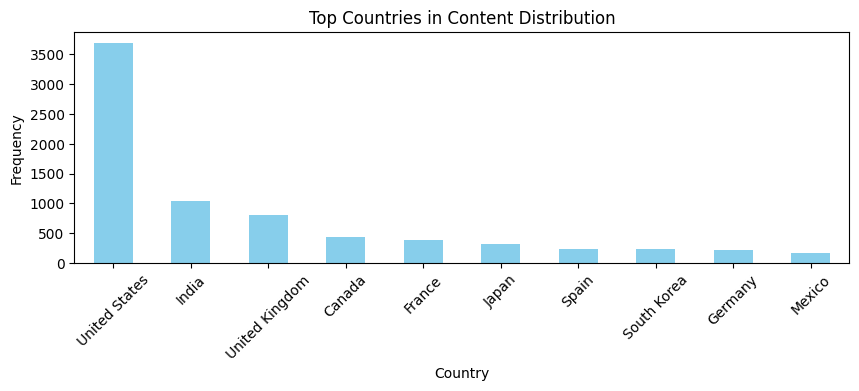

In [12]:
plt.figure(figsize=(10, 3))
country_frequencies.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Countries in Content Distribution')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

### Distribution of Content Durations

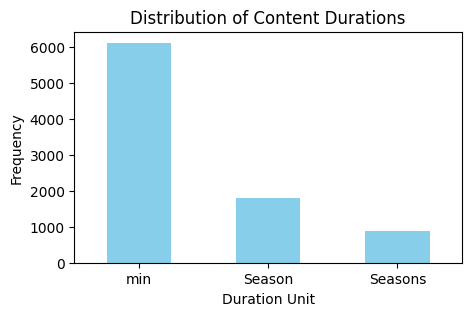

In [13]:
# Extract numeric duration values and units
df['duration_value'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_unit'] = df['duration'].str.extract('([a-zA-Z]+)')

# Calculate the frequency of each duration unit
duration_frequencies = df['duration_unit'].value_counts()

# Plot duration unit frequencies using a bar plot
plt.figure(figsize=(5, 3))
duration_frequencies.plot(kind='bar', color='skyblue')
plt.title('Distribution of Content Durations')
plt.xlabel('Duration Unit')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


### Top Content Genres

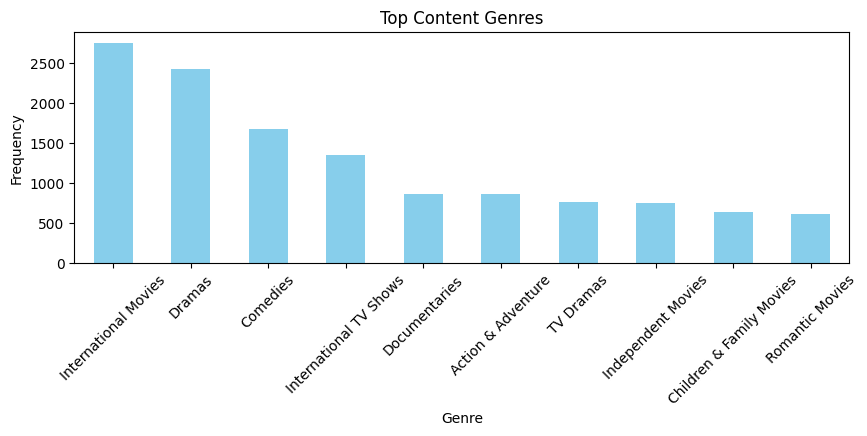

In [14]:
# Calculate the frequency of each genre
genre_frequencies = df['listed_in'].str.split(',').explode().str.strip().value_counts()

# Plot top genres using a bar plot
plt.figure(figsize=(10, 3))
genre_frequencies.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Content Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## 1. How has the number of movies released per year changed over the last 20-30 years?

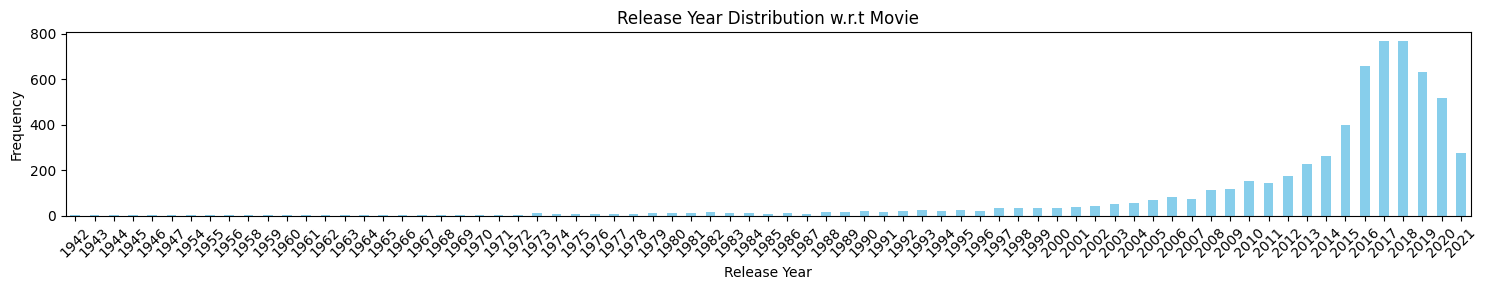

In [15]:
def plot_release_year_distribution(df, column_name, value):
  # Filter rows with value in the column_name column
  column_df = df[df[column_name].str.contains(value, case=False, na=False)]

  # Count the frequency of each release year
  release_year_counts = column_df['release_year'].value_counts().sort_index()

  # Plot the bar graph
  plt.figure(figsize=(15, 3))
  release_year_counts.plot(kind='bar', color='skyblue')
  plt.title(f'Release Year Distribution w.r.t {value}')
  plt.xlabel('Release Year')
  plt.ylabel('Frequency')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

plot_release_year_distribution(df,'type', 'Movie')

**Observation:** Over the past two to three decades, a discernible pattern emerges in the release strategy of Netflix films, resembling that of a mountain formation.

## 2. Comparison of tv shows vs. movies.

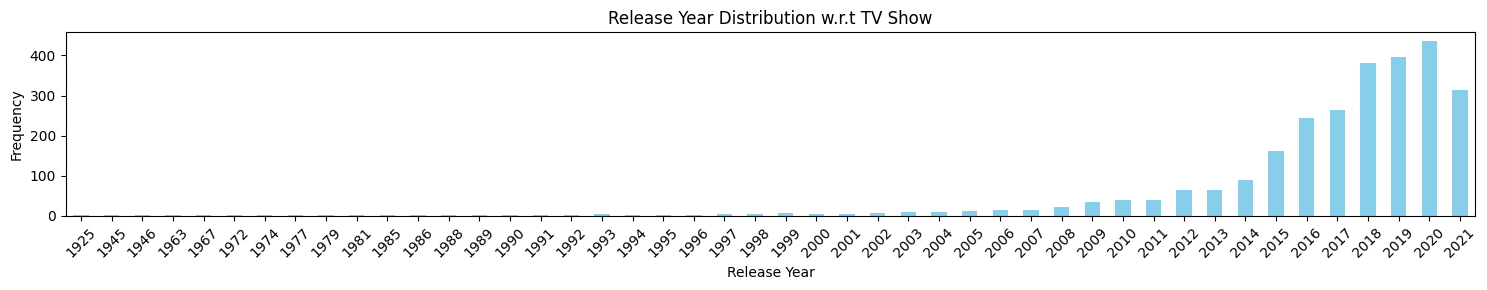

In [16]:
plot_release_year_distribution(df,'type', 'TV Show')

**Observation:**

*Content Release Frequency:*
* Movies are more frequently released compared to TV shows.

*TV Show Release Progression:*
* TV shows started gaining momentum in terms of releases from the year 1988.
They achieved the milestone of 100 releases per year in 2015.

*Content Peaks:*
* The years 2017 and 2018 marked the highest peak of movie releases.
TV shows show the potential to reach a peak in 2021 or 2022.


### 3. Does Neflix has more focus on TV Shows than movies in recent years


**Observation:**
* Evidently, the distribution chart indicates a decline in the frequency of movie additions in recent years.
* In contrast, TV shows are being added more frequently, suggesting a greater emphasis on this content type.
* The trend suggests a likelihood of continued increase in TV show additions in the upcoming years.

### 4. What is the best time to launch a TV show?

**Observation:** from above observation it is clear that 2021 or 2022 are gonna be best years for TV Show launch

*TV Ratings*

* TV-Y: All Children
* TV-Y7: Directed to Older Children
* TV-Y7 FV: Directed to Older Children - Fantasy Violence
* TV-G: General Audience
* TV-PG: Parental Guidance Suggested
* TV-14: Parents Strongly Cautioned
* TV-MA: Mature Audience Only


*Movie Ratings*

* G: General Audiences
* PG: Parental Guidance Suggested
* PG-13: Parents Strongly Cautioned
* R: Restricted
* NC-17: Clearly Adult

*Others*
* NR: Not Rated
* UR: Unrated
* nan: blanks

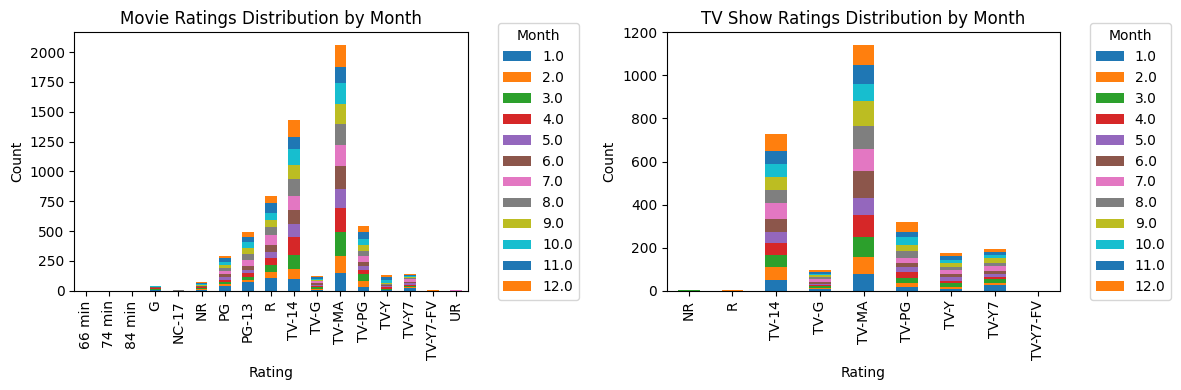

In [17]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['month'] = df['date_added'].dt.month

# Separate movies and TV shows
movies_df = df[df['type'] == 'Movie']
tv_shows_df = df[df['type'] == 'TV Show']

# Create pivot tables to analyze ratings distribution by month for movies and TV shows
movies_ratings_pivot = movies_df.pivot_table(index='rating', columns='month', aggfunc='size', fill_value=0)
tv_shows_ratings_pivot = tv_shows_df.pivot_table(index='rating', columns='month', aggfunc='size', fill_value=0)

# # Order ratings for better visualization
# movie_rating_order=['G', 'PG', 'PG-13',  'R', 'NC-17']
# tv_rating_order = ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA', ]

# Reorder and plot the distribution for movies
plt.figure(figsize=(12, 4))
# movies_ratings_pivot = movies_ratings_pivot.reindex(movie_rating_order)
plt.subplot(1, 2, 1)
movies_ratings_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Movie Ratings Distribution by Month')
# Add a legend outside the plot
plt.legend(title='Month',loc='right', bbox_to_anchor=(1.3, 0.5))

# Reorder and plot the distribution for TV shows
plt.subplot(1, 2, 2)
# tv_shows_ratings_pivot = tv_shows_ratings_pivot.reindex(tv_rating_order)
tv_shows_ratings_pivot.plot(kind='bar', stacked=True, ax=plt.gca())
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('TV Show Ratings Distribution by Month')
plt.legend(title='Month',loc='right', bbox_to_anchor=(1.3, 0.5))

plt.tight_layout()
plt.show()

**Observations:**
* Movies have a mix of the TV rating and Movie rating

*Optimal Launch Months:*
* There is no notable months for lauch of either Movie or TV-Show
* the data show even distribution of the content release throughout the year

*Content Maturity Focus:*
* There is a notable emphasis on mature content, indicated by a higher concentration of mature-rated shows and movies.


### 5. Analysis of actors/directors of different types of shows/movies.

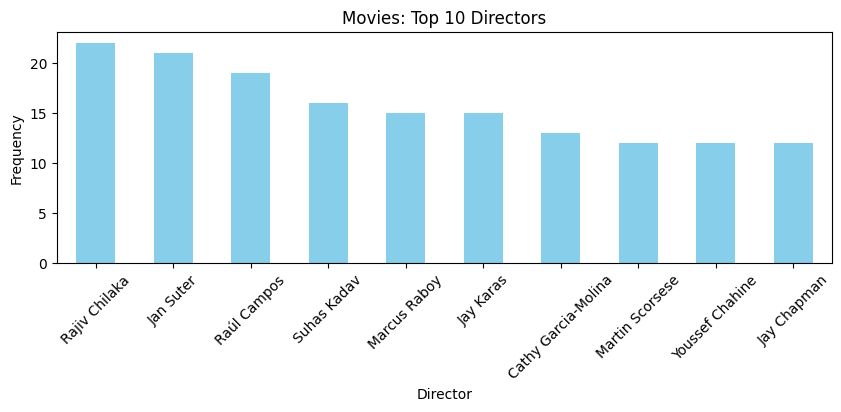

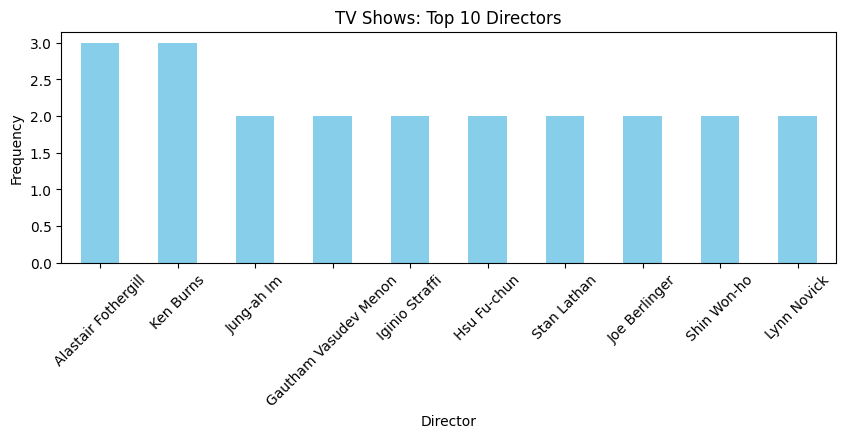

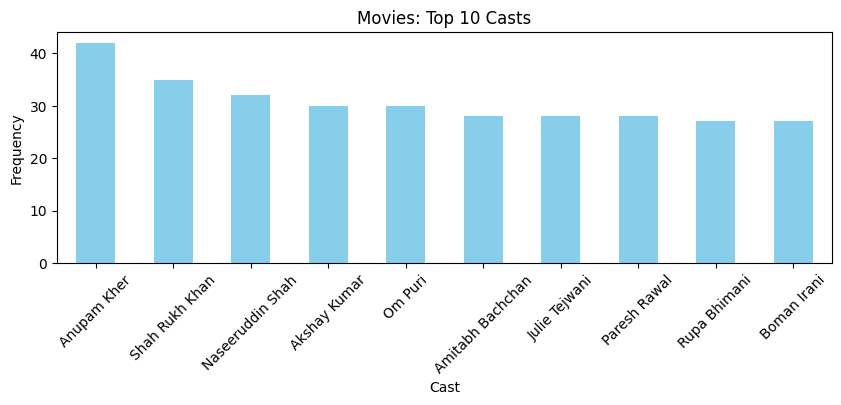

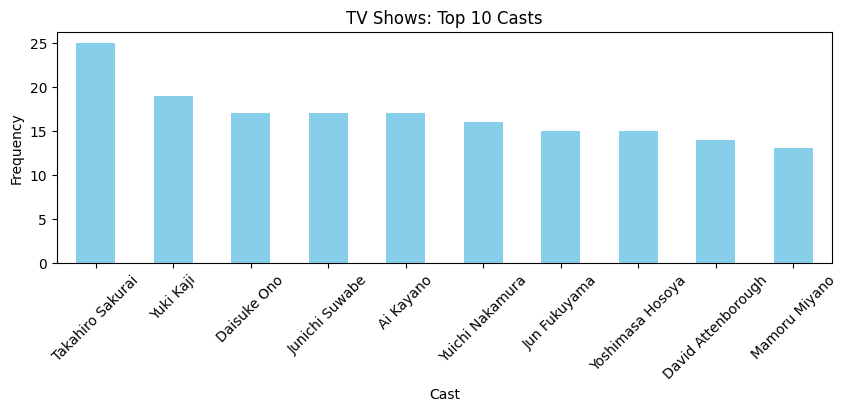

In [19]:
def plot_top_entities(data_frame, column_name, entity_name,cat, top_n=10):
    frequencies = data_frame[data_frame['type']==cat][column_name].str.split(', ').explode().str.strip().value_counts()

    plt.figure(figsize=(10, 3))
    frequencies.head(top_n).plot(kind='bar', color='skyblue')
    plt.title(f'{cat}s: Top {top_n} {entity_name}s')
    plt.xlabel(entity_name)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Plot top directors for movies
plot_top_entities(df, 'director', 'Director','Movie')

# Plot top directors for TV shows
plot_top_entities(df, 'director', 'Director','TV Show')

# Plot top cast members for movies
plot_top_entities(df, 'cast', 'Cast','Movie')

# Plot top cast members for TV shows
plot_top_entities(df, 'cast', 'Cast','TV Show')


**Observation:**
* **Movie Directors:**
 * Top directors have created a substantial amount of data, with each having directed at least 12 movies.
* **TV Show Directors:**
 * Directors of TV shows typically have a smaller number of creations, usually ranging from 2 to 3 TV shows.
 * This disparity in numbers could be attributed to the format differences between movies and TV shows.
 * TV shows often consist of multiple episodes and seasons, whereas movies are standalone entities.
* **Top Movie Cast and TV Show Cast:**
 * Both movie cast and TV show cast exhibit a linear trend in terms of popularity.
 * However, movie cast members tend to be approximately twice as popular as TV show cast members.
 * Notably, a significant portion of the top movie cast members hail from India.
In contrast, the TV show cast members predominantly originate from North-Eastern countries.

### 6. Understanding what content is available in different countries

In [20]:
# Mapping for conflicting country names
country_mapping = {
    'United States': 'United States of America',
    'Czech Republic':'Czechia',
    'Dominican Republic':'Dominican Rep.',
    'East Germany':'Germany',
    'Hong Kong':'Japan',
    'Liechtenstein':'Switzerland',
    'Malta':'Italy',
    'Mauritius':'Madagascar',
    'Samoa':'Australia',
    'Singapore':'Malaysia',
    'Soviet Union':'Russia',
    'Vatican City':'Italy',
    'West Germany':'Germany',
    'Cayman Islands':'Cuba',
    'Bermuda':'United States of America'
    # Add more mappings as needed
}

<Figure size 1000x400 with 0 Axes>

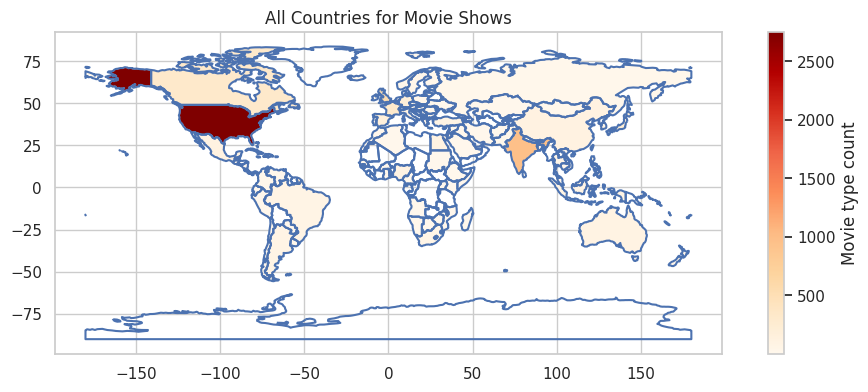

<Figure size 1000x400 with 0 Axes>

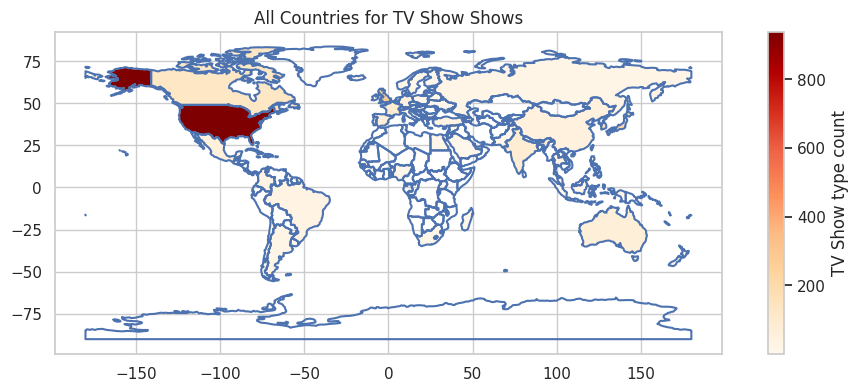

In [48]:
def plot_top_countries_map(df, show_type, num_top_countries=10):
    # Filter rows with the specified show type
    filtered_df = df[df['type'] == show_type].copy()

    # Split countries into separate rows
    filtered_df['country_list'] = filtered_df['country'].str.split(', ')

    # Explode country_list to separate rows
    exploded_df = filtered_df.explode('country_list')

    # Count the frequency of each country for the given show type
    country_counts = exploded_df['country_list'].str.strip().replace(country_mapping).value_counts()

    # Select top N countries for the given show type
    if(num_top_countries=='all'):
      top_countries =   country_counts
    else:
      top_countries = country_counts.head(num_top_countries)

    # Load a GeoDataFrame with country boundaries (replace with your own file path)
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge country counts with GeoDataFrame
    merged_data = world.merge(top_countries, how='left', left_on='name', right_index=True)

    # Set Seaborn style
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 4))
    # Plot the choropleth map
    ax = world["geometry"].boundary.plot(figsize=(10,4))
    merged_data.plot(column='country_list',ax=ax, cmap='OrRd', legend=True, legend_kwds={'label':f'{show_type} type count', "orientation":"vertical"})
    if(num_top_countries=='all'):
      plt.title(f'All Countries for {show_type} Shows')
    else:
      plt.title(f'Top {num_top_countries} Countries for {show_type} Shows')
    plt.tight_layout()
    plt.show()

# Call the function to plot top 10 countries for Movies on a choropleth map
plot_top_countries_map(df, 'Movie', num_top_countries='all')

plot_top_countries_map(df, 'TV Show', num_top_countries='all')

**Observation:**
* Movie production spans numerous countries worldwide, showcasing a global reach of cinematic creations.
* While TV shows are also produced internationally, there is a notable absence of content from several African nations.
* Both movies and TV shows exhibit a concentration in production within the United States of America.


### Action and Drama type Movies around the world

<Figure size 1000x400 with 0 Axes>

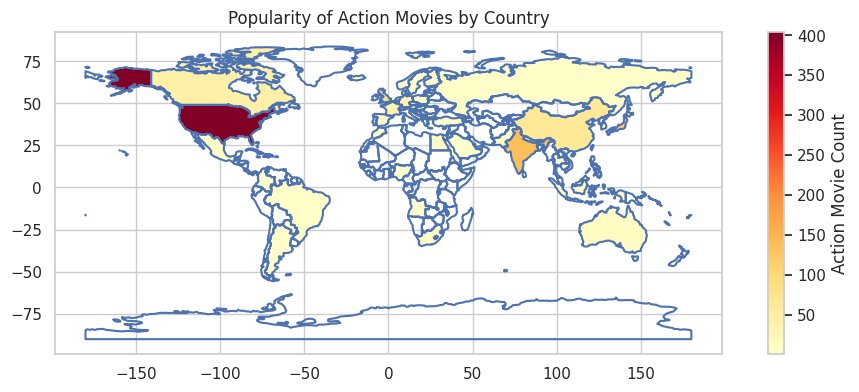

<Figure size 1000x400 with 0 Axes>

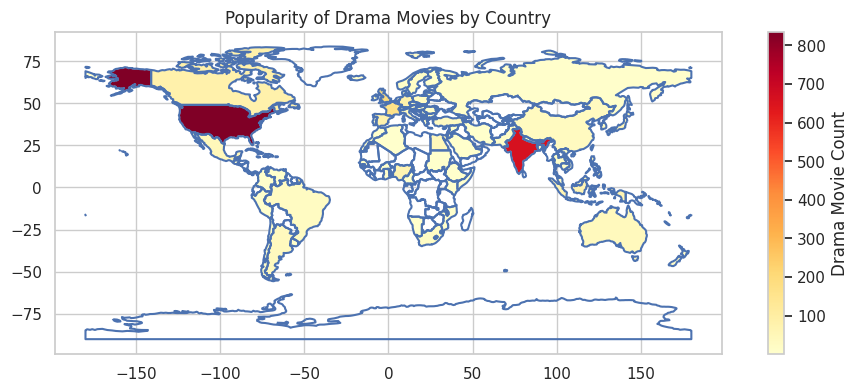

In [49]:
def plot_genre_popularity_by_country(df, genre, content_type):
    # Filter rows for the specified genre and content type
    filtered_df = df[(df['listed_in'].str.contains(genre, case=False, na=False)) & (df['type'] == content_type)]

    # Split and expand the comma-separated countries in the 'country' column
    country_series = filtered_df['country'].str.split(', ', expand=True)

    # Update 'country' column using the mapping
    country_series = country_series.stack().str.strip().replace(country_mapping)
    country_series.index = country_series.index.droplevel(-1)
    # print(country_series)

    # Load world map data from Natural Earth website
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Merge the expanded data with the world GeoDataFrame based on country names
    merged_data = world.merge(country_series.value_counts().reset_index(name='Count'),
                               left_on='name', right_on='index', how='left')

    # print(country_series.value_counts().reset_index(name='Count').head())
    # Set the figure size
    plt.figure(figsize=(10, 4))

    # Plot the choropleth map
    ax = world["geometry"].boundary.plot(figsize=(10,4))
    merged_data.plot(column='Count', ax=ax, cmap='YlOrRd', legend=True,
                          legend_kwds={'label': f'{genre} {content_type} Count'})
    plt.title(f'Popularity of {genre} {content_type}s by Country')
    plt.tight_layout()
    plt.show()


# Call the function to plot genre popularity map
plot_genre_popularity_by_country(df, 'Action', 'Movie')
plot_genre_popularity_by_country(df, 'Drama', 'Movie')

**Observation:**

*Action Movies:*

* Action movies enjoy global popularity, with a consistent distribution of interest across different regions.
* Notably, India, China, and North America exhibit a higher affinity for action movies, contributing to their widespread appeal.

*Drama Movies:*

* For drama movies, distinct preferences emerge across various countries.
* India and the United States stand out as countries where drama movies garner significant interest.

### Movies vs TV-Show Release year pattern

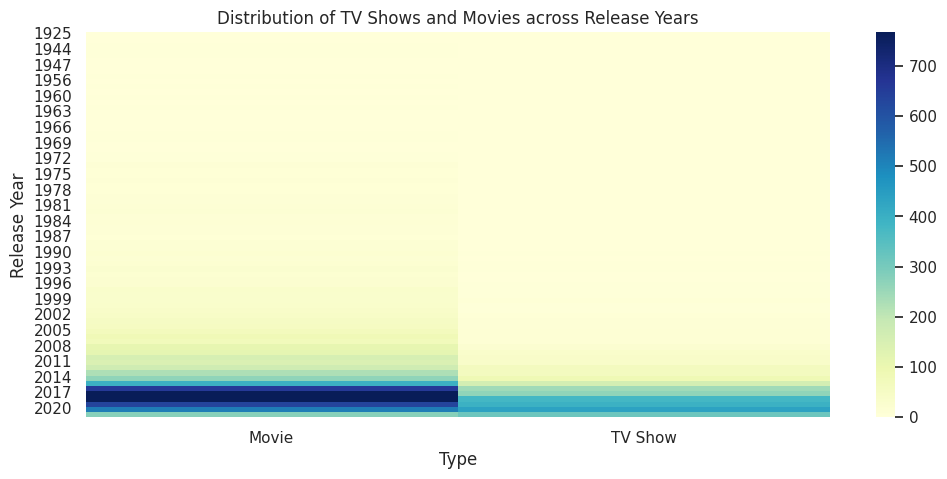

In [32]:
# Filter out missing 'release_year' values
df_cleaned = df.dropna(subset=['release_year'])

# Create a pivot table to count the occurrences of each release year and type (TV show or Movie)
pivot_table = df_cleaned.pivot_table(index='release_year', columns='type', aggfunc='size', fill_value=0)

# Plot the heatmap-like bar plot
plt.figure(figsize=(12, 5))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, fmt='g')
plt.title('Distribution of TV Shows and Movies across Release Years')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.show()

**Observation:**

*Comparing Onscreen Content:*

* *Movie Evolution:* Movies have been in existence for a considerable period, showcasing a long-standing tradition in the entertainment industry.
* *TV Show Emergence:* TV shows, on the other hand, have gained prominence primarily in recent decades, signifying a more recent trend in content creation.

*Content Count Dynamics:*

* *Single Release vs. Multi-Episode:* Movies are typically single-release content, resulting in a higher count due to numerous individual movie titles.
* *Episode Structure:* TV shows encompass multiple episodes and seasons, leading to a comparatively lower count of TV show titles. Each TV show title represents a collection of episodes.

### Rating vs RelaseYear heatmap

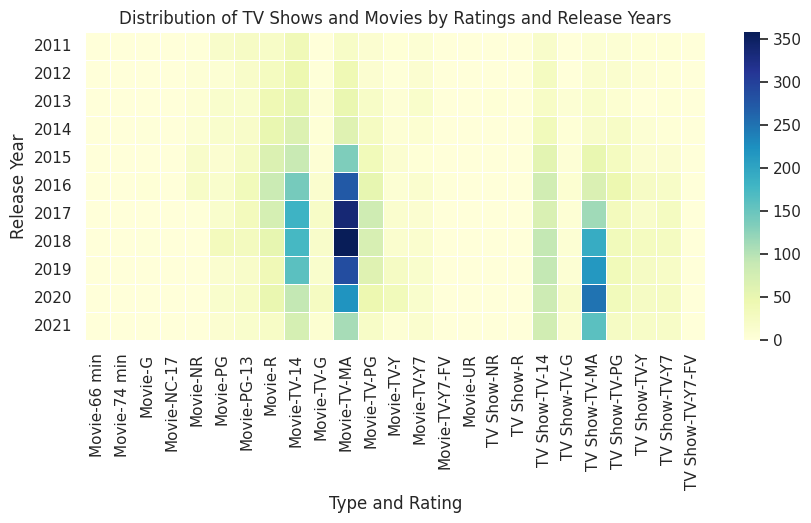

In [34]:
# Filter out missing values in 'release_year' and 'rating' columns
df_cleaned = df.dropna(subset=['release_year', 'rating'])

# Create a pivot table to count the occurrences of each release year, rating, and type (TV show or Movie)
pivot_table = df_cleaned[df_cleaned.release_year>2010].pivot_table(index='release_year', columns=['type', 'rating'], aggfunc='size', fill_value=0)

# Sort columns by type (TV show or Movie)
sorted_columns = sorted(pivot_table.columns, key=lambda x: (x[0], x[1]))

# Reorganize the pivot table columns
pivot_table = pivot_table[sorted_columns]

# Plot the heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=False, fmt='g', linewidths=0.5)
plt.title('Distribution of TV Shows and Movies by Ratings and Release Years')
plt.xlabel('Type and Rating')
plt.ylabel('Release Year')
plt.show()

**Observation:**

*Rating Distribution Analysis:*

* *Movies:* The rating distribution for movies is diverse, encompassing a mix of Movie and TV-style ratings. Interestingly, some movies also carry TV ratings, indicating a blend of content styles.
* *TV Shows:* TV shows predominantly carry TV-style ratings, focusing on a specific classification.

*Popular Ratings:*

* *Universal Appeal:* The "TV_MA" rating holds the highest popularity across both movies and TV shows, suggesting its broad appeal.
* *Audience-Friendly:* Following closely is the "TV-14" rating, which emerges as the second most popular choice in both movies and TV shows.

### PairPlot on various numeric and categorical columns

<Figure size 1000x500 with 0 Axes>

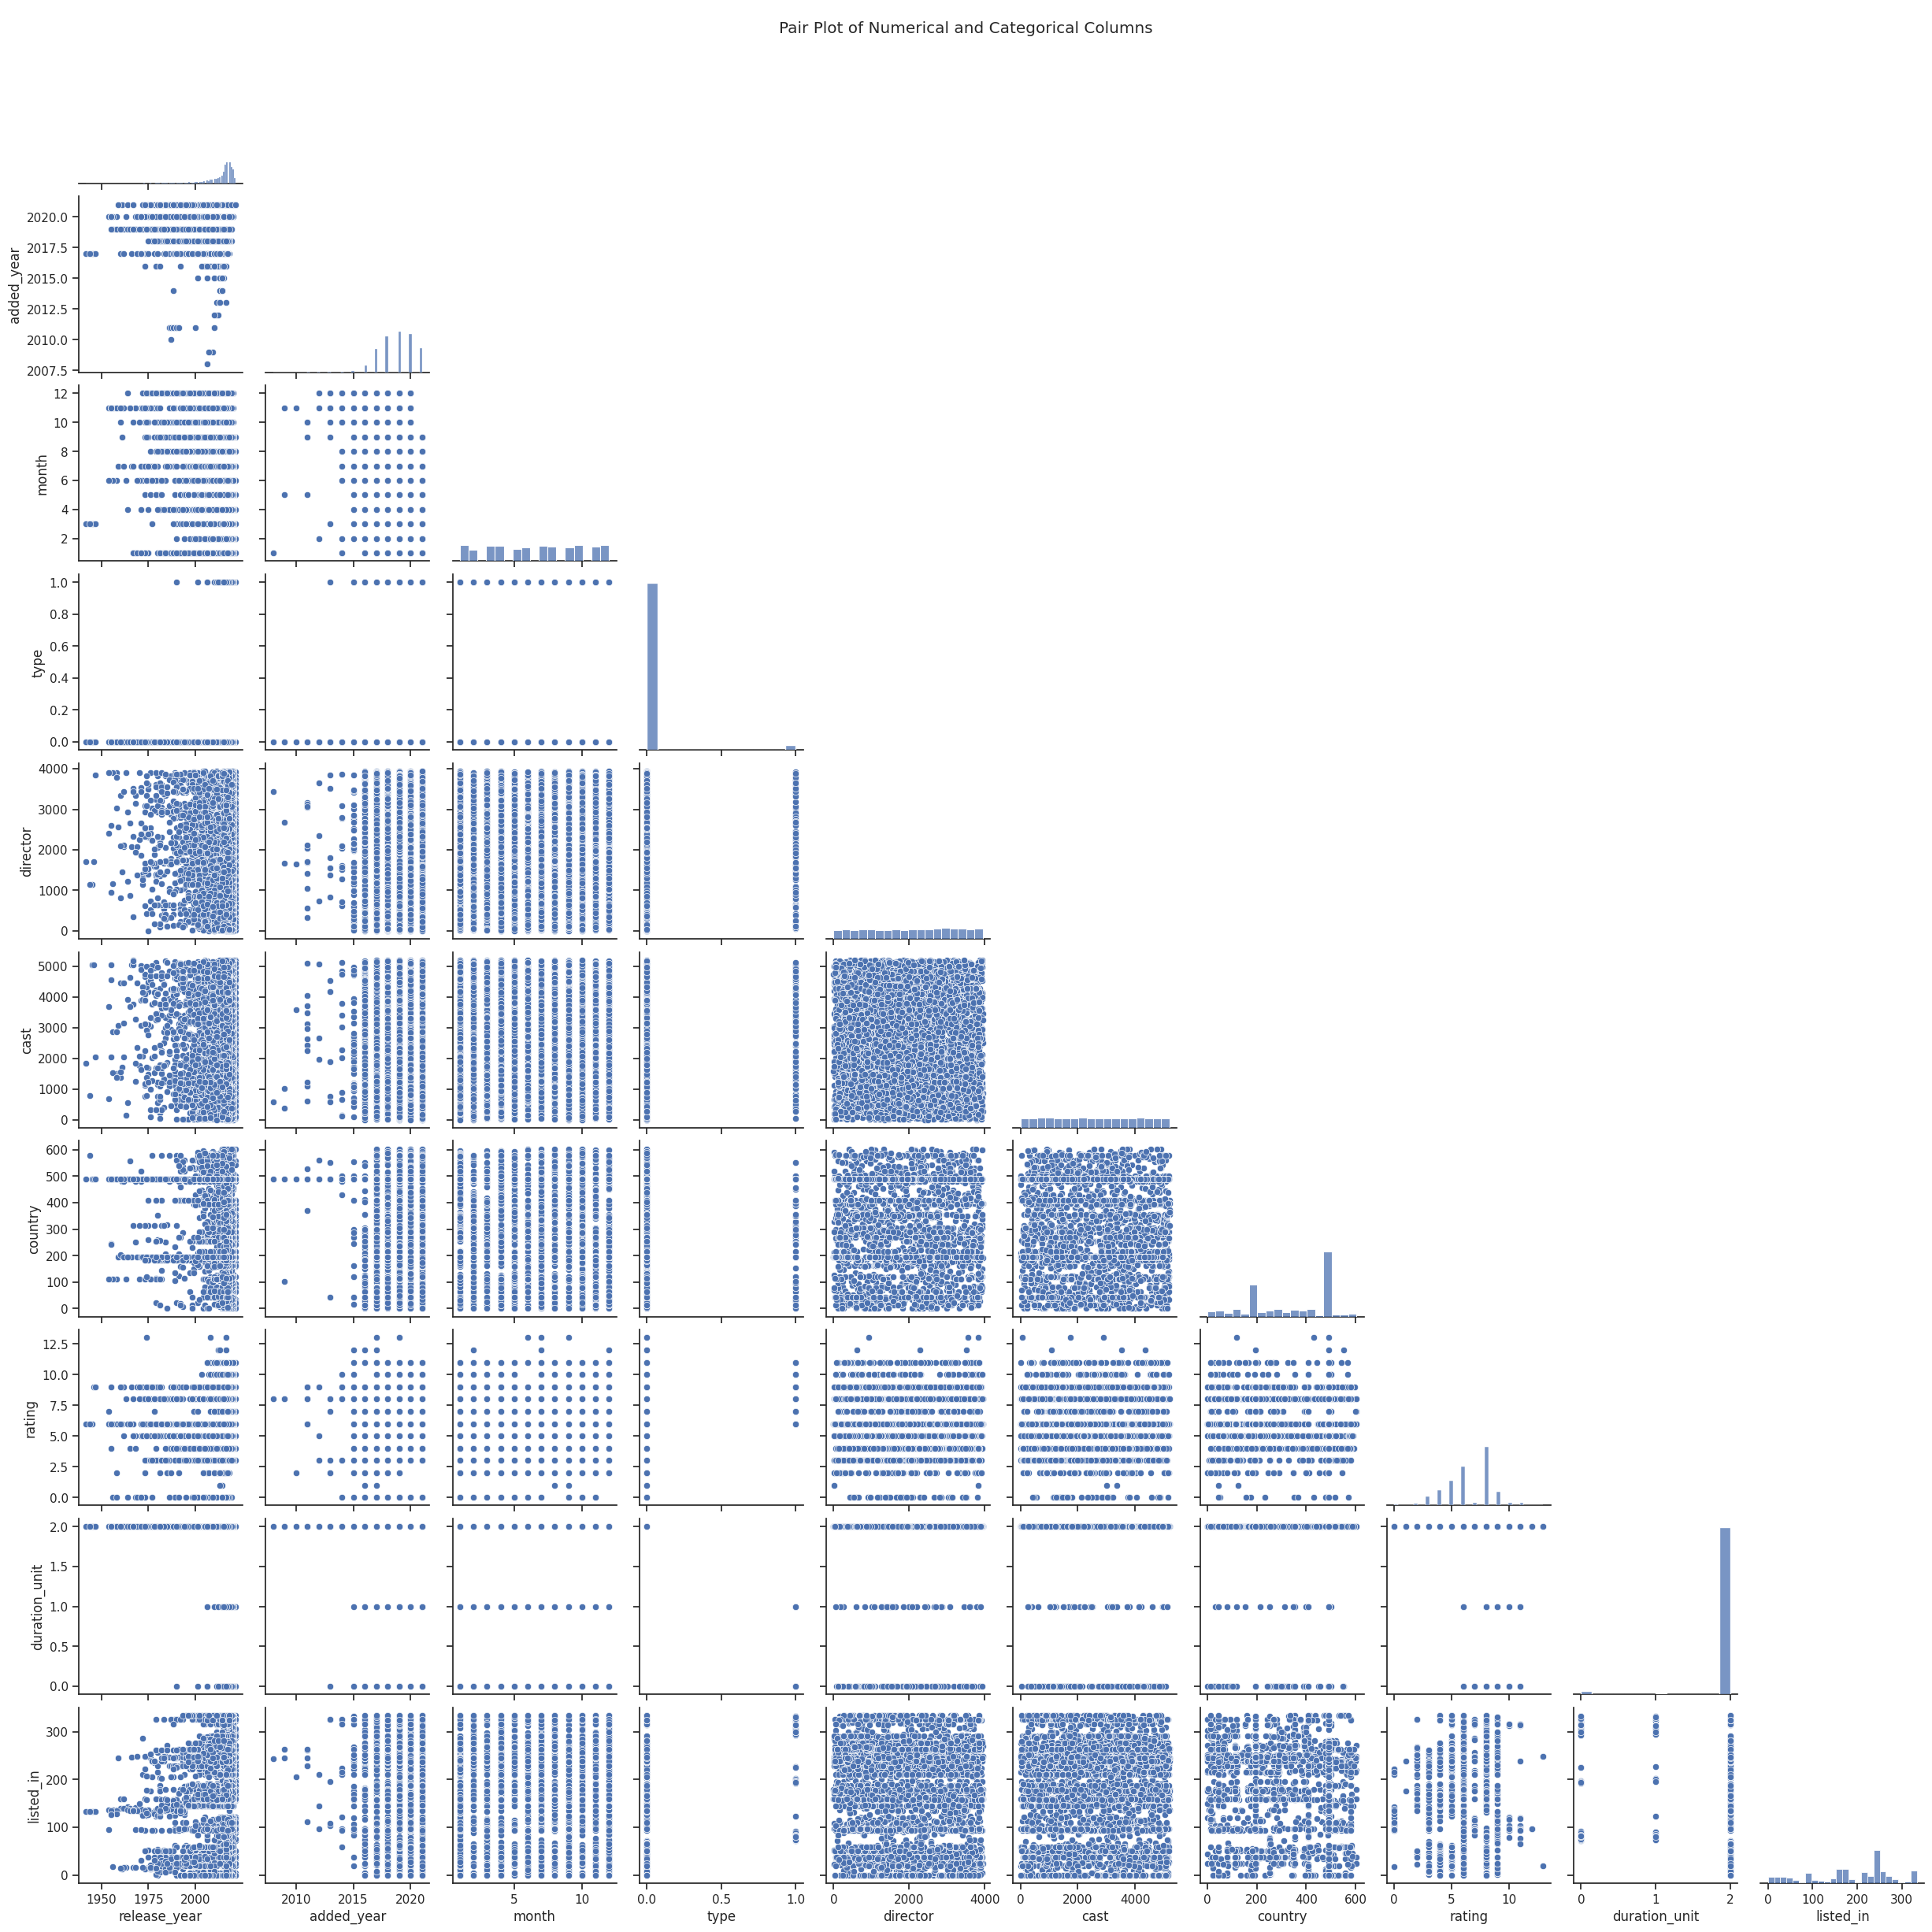

In [37]:
# Filter out missing values in numerical and categorical columns
numerical_columns = ['release_year','added_year','month']                                                          # Numerical columns
categorical_columns = ['type','director','cast','country', 'rating', 'duration_unit','listed_in']          # Categorical columns

# Combine numerical and categorical columns
columns_to_include = numerical_columns + categorical_columns
df_cleaned = df.dropna(subset=columns_to_include)

# Encode categorical columns as numerical labels
for col in categorical_columns:
    df_cleaned[col] = pd.Categorical(df_cleaned[col])
    df_cleaned[col] = df_cleaned[col].cat.codes

# Create a pair plot
plt.figure(figsize=(10,5))
sns.set(style='ticks')
sns.pairplot(df_cleaned[columns_to_include], corner='lower')
plt.suptitle('Pair Plot of Numerical and Categorical Columns')
plt.show()

**Observation:**
* **Release year:**
  * Most movies were released in later years, indicating a growing trend in content production.
  * Over time, new genres have emerged while some older genres have become less popular or discontinued.
  * A similar pattern is observed for ratings, with both old and new ratings coexisting in the industry.
  * Active participation from certain countries is noticeable, while others have joined more recently.
  * The distribution of directors and cast follows a bell curve, with more recent years seeing higher participation.
* **Added year:**
  * Content accumulation across genres appears uniform, indicating consistent additions over time.
  * Netflix initially focused on movies before expanding into TV shows, suggesting a transition in content strategy.
  * The platform started with a few rating types, eventually incorporating a wide range before settling on a select set.
  * Initially limited to a few countries, content from various nations was added as the platform grew.
  * Similar trends are observed in cast and director additions, following a bell curve distribution.
* **type:**
  * For movies, exploration extended to different and all types of ratings.
  * Conversely, for TV shows, the focus seems to be on a specific set of ratings.


### Box Plot of content type along the added_year

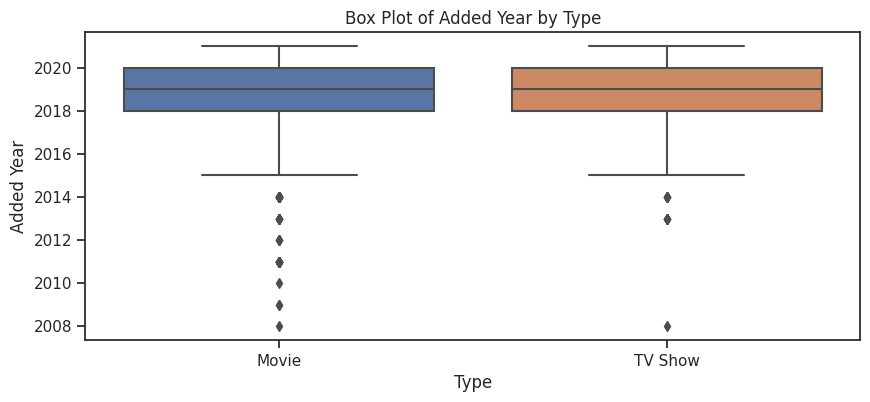

In [39]:
# Filter out missing values in 'added_year' and 'type' columns
df_cleaned = df.dropna(subset=['added_year', 'type'])

# Create a box plot
plt.figure(figsize=(10, 4))
sns.boxplot(x='type', y='added_year', data=df_cleaned)
plt.title('Box Plot of Added Year by Type')
plt.xlabel('Type')
plt.ylabel('Added Year')
plt.show()

**Observation:**

*Content Addition Patterns:*

* The addition rate of both movies and TV shows to Netflix exhibits remarkable similarity, suggesting a balanced approach to content curation.
* The primary distinction lies in movies having a higher number of outliers towards starting years, indicating Netflix has started its platform by curating the Movies at the begining of their journey

### Ragting vs Relase year box-plot

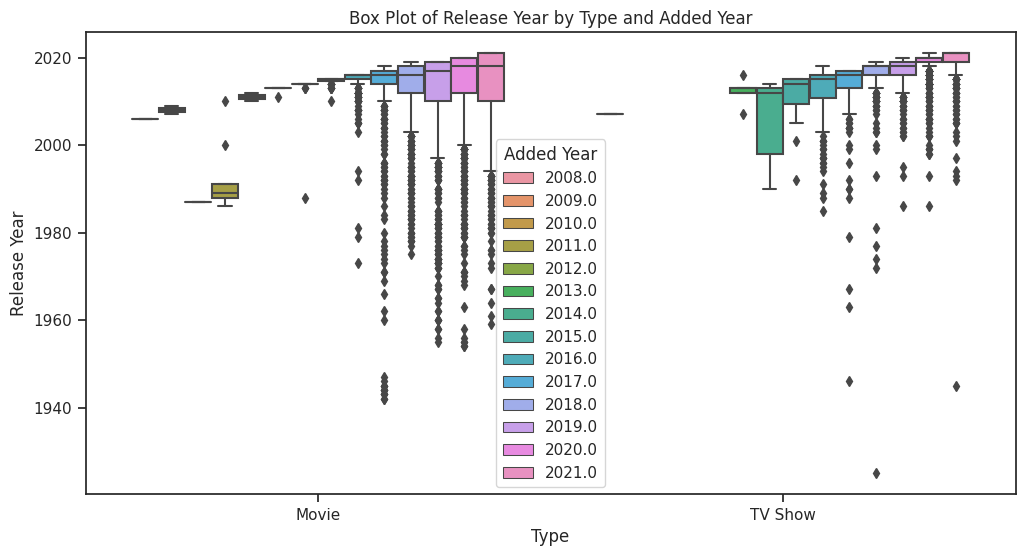

In [42]:
# Filter out missing values in 'added_year', 'release_year', and 'type' columns
df_cleaned = df.dropna(subset=['added_year', 'release_year', 'type'])

# Create a box plot with hue for release year
plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='release_year', hue='added_year', data=df_cleaned)
plt.title('Box Plot of Release Year by Type and Added Year')
plt.xlabel('Type')
plt.ylabel('Release Year')
plt.legend(title='Added Year')
plt.show()

**Observation:**
* *Movies:* Netflix maintains a consistent trend of adding movies throughout the years, encompassing a broad range of release years. This distribution suggests an ongoing effort to offer a diverse selection.
* *TV Shows:* In contrast, Netflix focuses on the addition of more recent TV shows, demonstrated by size of the box-plot in the recent years. However, there are instances of TV shows from older release years, depicted as outliers, indicating the platform's endeavor to curate content from different eras.

### content rating vs Relase Year

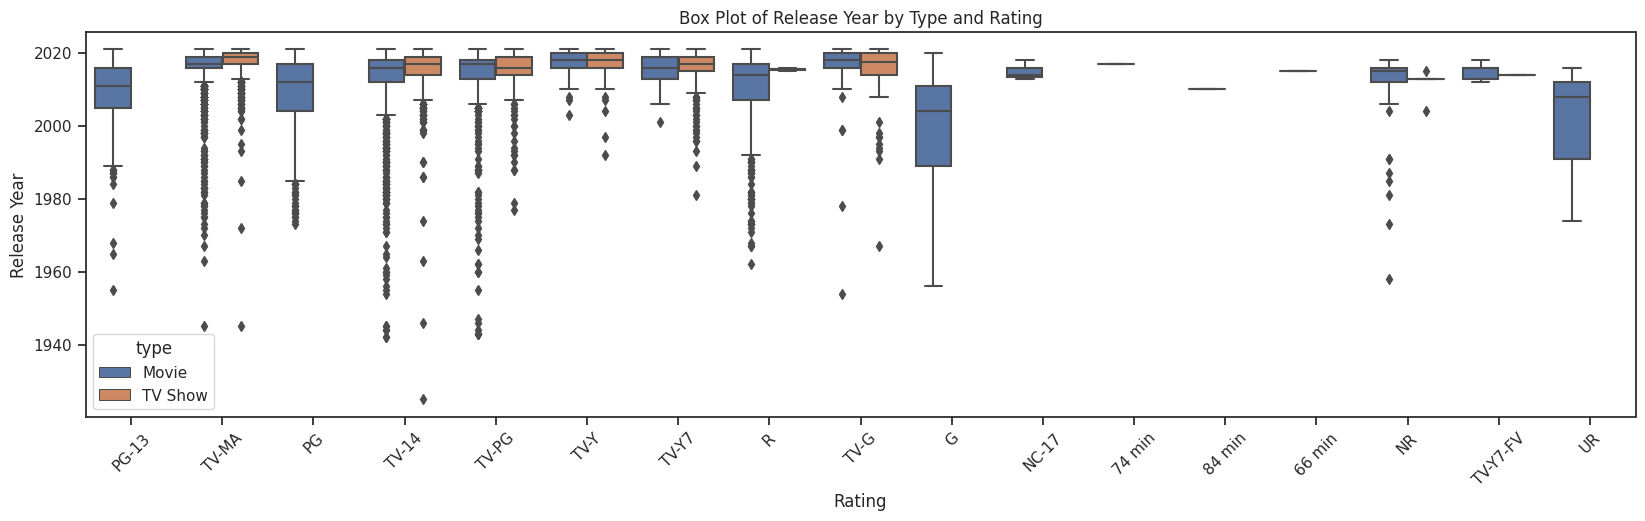

In [47]:
# Filter out missing values in 'rating', 'release_year', and 'type' columns
df_cleaned = df.dropna(subset=['release_year', 'rating', 'type'])

# Create a box plot with hue for release year
plt.figure(figsize=(20, 5))
sns.boxplot(x='rating', y='release_year', hue='type', data=df_cleaned)
plt.title('Box Plot of Release Year by Type and Rating')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.ylabel('Release Year')
plt.legend(title='type')
plt.show()

**Observation:**

*Rating Distribution and Release Year Trends:*

* *TV-14 and TV-PG:* These TV show ratings, 'TV-14' and 'TV-PG,' exhibit a common pattern. They are concentrated in recent years, yet they also feature numerous outliers from previous decades, indicating a mix of contemporary and classic content.
* *G Rating in Movies:* The 'G' rating for movies is notably spread across multiple decades without significant outliers, suggesting a consistent distribution of family-friendly content over time.
* *UR Rating in Movies:* The pattern for 'UR' rating in movies closely resembles that of 'G' rating, hinting at a similar even distribution across years.
* *Generic Ratings Spread:* Generic ratings, like 'PG-13,' 'PG,' 'G,' and 'TV-PG,' appear to be more widely distributed across release years, indicating a diverse presence of these ratings over time.

## Comments on the Range of Attributes:

The range of attributes in the dataset is diverse, covering various aspects of the content available on Netflix. These attributes include categorical variables like "type," "genre," "country," and "rating," which provide insights into the nature of the content. The numerical attributes "release_year" and "added_year" allow us to track the temporal distribution of the content. Additionally, the dataset features attributes related to cast and crew, such as "director" and "cast," which offer insights into the individuals involved in the production.

## Comments on the Distribution of Variables and Relationship Between Them:
The dataset's variables exhibit diverse distributions and relationships, indicating the varied nature of content on Netflix. We observe that "release_year" spans a wide range, from 1925 to 2021, reflecting the historical evolution of content. Similarly, "added_year" captures the temporal distribution of content addition to the platform, with a peak in recent years. The distribution of "type" reveals that movies constitute around 70% of the content, while TV shows contribute around 30%.

## Comments for Each Univariate and Bivariate Plot:

**Temporal Distribution of the Date Added:**
* The temporal distribution plot highlights that content was added between 2008 and 2021, mirroring the growth of Netflix over the years.

**Content Type:**
* The bar plot showcasing content types underscores the dominance of movies in the dataset, indicating a broader selection of movies compared to TV shows.

**Genres and Their Popularity:**
* The genre distribution plot signifies the diversity of content genres available on Netflix. This diversity caters to a wide range of audience preferences.

**Countries and Their Popularity:**
* The distribution of content across countries reveals a global representation, with some countries having a lower contribution, emphasizing the platform's international reach.

**Comparison of TV Shows vs. Movies:**
* The bar plot depicting the comparison between TV shows and movies underscores the higher frequency of movie releases compared to TV shows.

**TV Show Release Progression:**
* The line plot tracking TV show releases over the years highlights a steady growth in TV show additions, with a notable increase starting from the late 1980s.

**Does Netflix Focus on TV Shows?**
* The line plot contrasting the addition of movies and TV shows indicates a potential shift in focus towards TV shows in recent years.

**Best Time to Launch a TV Show:**
* The line plot for the best time to launch a TV show suggests that the years 2021 and 2022 could be favorable for TV show launches.

**Ratings vs. Release Year Heatmap:**
* The heatmap unveils the distribution of ratings across release years, revealing how certain ratings have evolved and remained popular over time.

**PairPlot on Numeric and Categorical Columns:**
The pair plot showcases relationships between various attributes. It illustrates the distribution of release years, added years, and how they correlate with each other. It also highlights patterns in content ratings and their relationships with release years and added years.

**Box Plot of Content Type along Added Year:**
* The box plot reveals the similarity in the addition rate of both movies and TV shows, with occasional movie additions in older years.

**Rating vs. Release Year Box Plot:**
* The box plot demonstrates the content addition pattern, with movies consistently being added over the years and TV shows predominantly added in recent times

**Content Rating vs. Release Year:**
* The box plot captures the distribution of ratings over release years, indicating trends in how different ratings have been spread across time.